In [1]:
#bootstraping with starcraft
# step 1: get your data
# step 2: make a copies 
# step 3: calculate your stat for each copy

In [4]:
# let's calculate CI of 95%
import pandas as pd
file='../../../resource-datasets/starcraft/SkillCraft1_Dataset.csv'
star=pd.read_csv(file)

In [6]:
star.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [11]:
apm=star.APM
apm.mean()

117.04694709278338

In [16]:
import numpy as np

bootstrap_means=[np.mean(np.random.choice(apm,size=len(apm))) for i in range(1000)]

In [19]:
from scipy.stats import scoreatpercentile
lower=scoreatpercentile(bootstrap_means,2.5)
upper=scoreatpercentile(bootstrap_means,97.5)
lower,upper

/Users/shadow/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(115.2968329736377, 118.81511269705447)

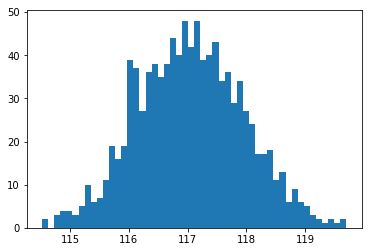

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(bootstrap_means,bins=50);

In [25]:
#sanity check with stats
from scipy import stats

In [28]:
n_dst=stats.norm()
high_z=n_dst.ppf(0.975)
low_z=n_dst.ppf(0.025)
high_z,low_z

(1.959963984540054, -1.9599639845400545)

In [29]:
std=np.std(apm)
mean=np.mean(apm)
sqrt=np.sqrt(len(apm))
lower1=mean+low_z*std/sqrt
higher1=mean+high_z*std/sqrt
lower1,higher1

(115.29987665595061, 118.79401752961616)